<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [24]:
import pandas as pd
import seaborn as sns
from collections import namedtuple   # Convenient to store the data rows
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [25]:
movies = pd.read_csv('imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [26]:
# Answer:
movies.shape[0] #shape will return row and column numbers-> shapre[0] to get only the rows.

979

#### Check the data type of each column.

In [27]:
# Answer:
movies.dtypes # dtypes return column types

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [28]:
# Answer:
movies.duration.mean() # mean() returns mean for column duration.

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [29]:
# Answer:
movies_sorted = movies.sort_values('duration') #sorts duration column ascending.
movies_shortest_longest = movies_sorted.iloc[[0, -1]] #gets first and last row.
movies_shortest_longest

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fc4b44cf8>]],
      dtype=object)

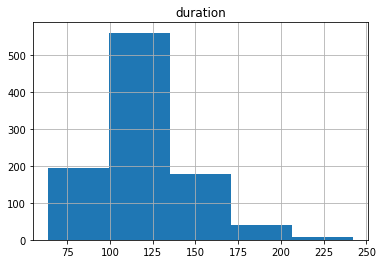

In [30]:
# Answer:
movies.hist(column='duration', bins=5) # Creates a histogram using duration column and divide it in 5 bins.

#### Use a box plot to display that same data.

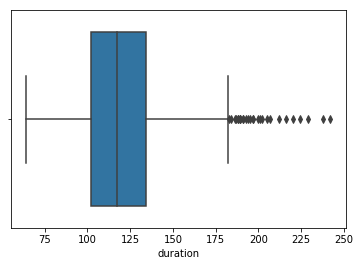

In [31]:
# Answer:
ax = sns.boxplot(x=movies.duration) #Creates a boxplot

## Intermediate level

#### Count how many movies have each of the content ratings.

In [32]:
# Answer:
qty_by_content = movies.groupby(['content_rating'])['title'].count() # group by content_rating and count by title
qty_by_content

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

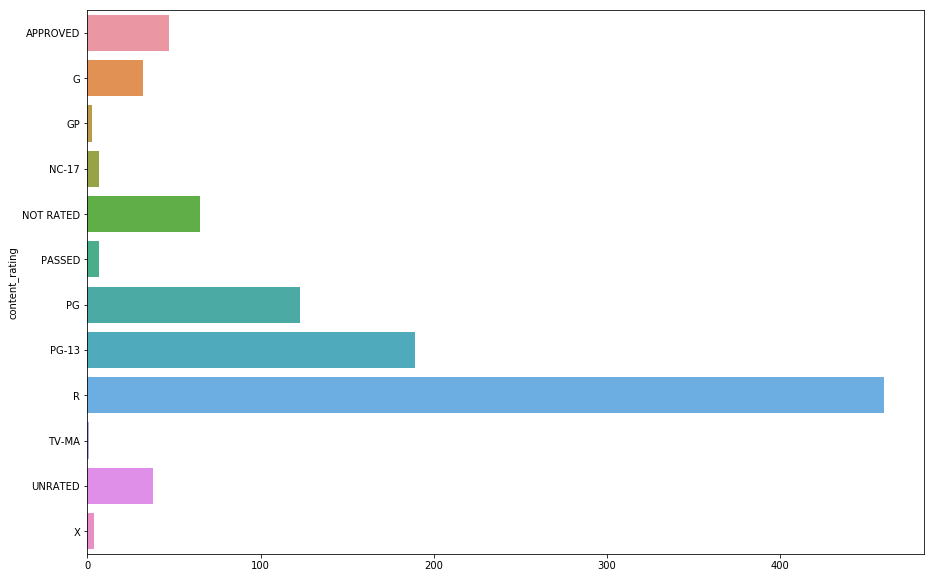

In [33]:
# Answer:
plt.figure(figsize=(15,10)) # Set plot size
sns.barplot(qty_by_content.values, qty_by_content.index) #plot content_rating and movie qty

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [34]:
# Answer:
movies['content_rating'] = movies['content_rating'].replace(to_replace={"NOT RATED", "APPROVED", "PASSED", "GP"}, value="UNRATED", regex=True) #Using Replace function to replce values
movies['content_rating']

0            R
1            R
2            R
3        PG-13
4            R
5      UNRATED
6      UNRATED
7        PG-13
8            R
9            R
10       PG-13
11       PG-13
12          PG
13       PG-13
14       PG-13
15       PG-13
16           R
17     UNRATED
18           R
19          PG
20           R
21           R
22     UNRATED
23           R
24           R
25       PG-13
26       PG-13
27           R
28           R
29     UNRATED
        ...   
949         PG
950          R
951          R
952          R
953         PG
954      PG-13
955          R
956         PG
957          R
958      PG-13
959          R
960      PG-13
961          R
962         PG
963          R
964      PG-13
965      PG-13
966      PG-13
967          R
968          R
969          R
970          R
971          R
972      NC-17
973      PG-13
974         PG
975         PG
976      PG-13
977         PG
978          R
Name: content_rating, Length: 979, dtype: object

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [35]:
# Answer:
movies['content_rating'] = movies['content_rating'].replace(to_replace={"X", "TV-MA"}, value="NC-17", regex=True) #Using Replace function to replce values
movies['content_rating']

0            R
1            R
2            R
3        PG-13
4            R
5      UNRATED
6      UNRATED
7        PG-13
8            R
9            R
10       PG-13
11       PG-13
12          PG
13       PG-13
14       PG-13
15       PG-13
16           R
17     UNRATED
18           R
19          PG
20           R
21           R
22     UNRATED
23           R
24           R
25       PG-13
26       PG-13
27           R
28           R
29     UNRATED
        ...   
949         PG
950          R
951          R
952          R
953         PG
954      PG-13
955          R
956         PG
957          R
958      PG-13
959          R
960      PG-13
961          R
962         PG
963          R
964      PG-13
965      PG-13
966      PG-13
967          R
968          R
969          R
970          R
971          R
972      NC-17
973      PG-13
974         PG
975         PG
976      PG-13
977         PG
978          R
Name: content_rating, Length: 979, dtype: object

#### Count the number of missing values in each column.

In [36]:
# Answer:
movies.isnull().sum() # sum values where null

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [37]:
# Answer:
movies.content_rating.fillna('UNRATED', inplace=True) # content_rating was the only column with missing values. Used fillna to fill with "UNRATED" value

In [38]:
movies[pd.isnull(movies).any(axis=1)] # show rows with missing data (just to confirm if were fixed)

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [39]:
# Answer:
longer_t2 = movies[movies['duration']>=120]['star_rating'].mean() #Get average where duration >= 2 hrs
shorter_t2 = movies[movies['duration']<120]['star_rating'].mean() #Get average where duration < 2 hrs

print("AVG 2hr/longer :",longer_t2,"--- AVG shorter :",shorter_t2)


AVG 2hr/longer : 7.948898678414082 --- AVG shorter : 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

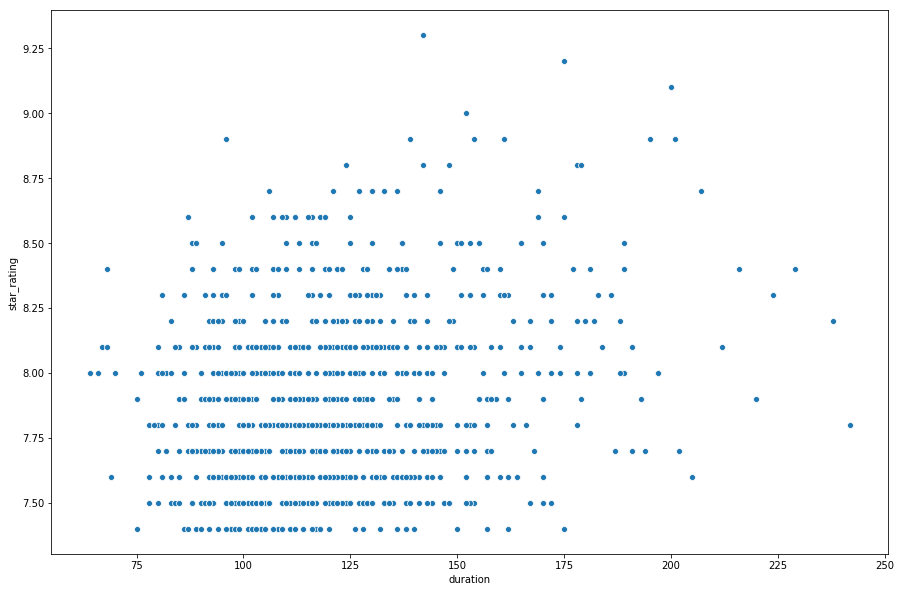

In [40]:
# Answer:
plt.figure(figsize=(15,10)) #plot size
ax = sns.scatterplot(x="duration", y="star_rating", data=movies) #Create scatterplot

#### Calculate the average duration for each genre.

In [41]:
# Answer:
movies.groupby('genre')['duration'].mean() #Get duration mean by genre

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

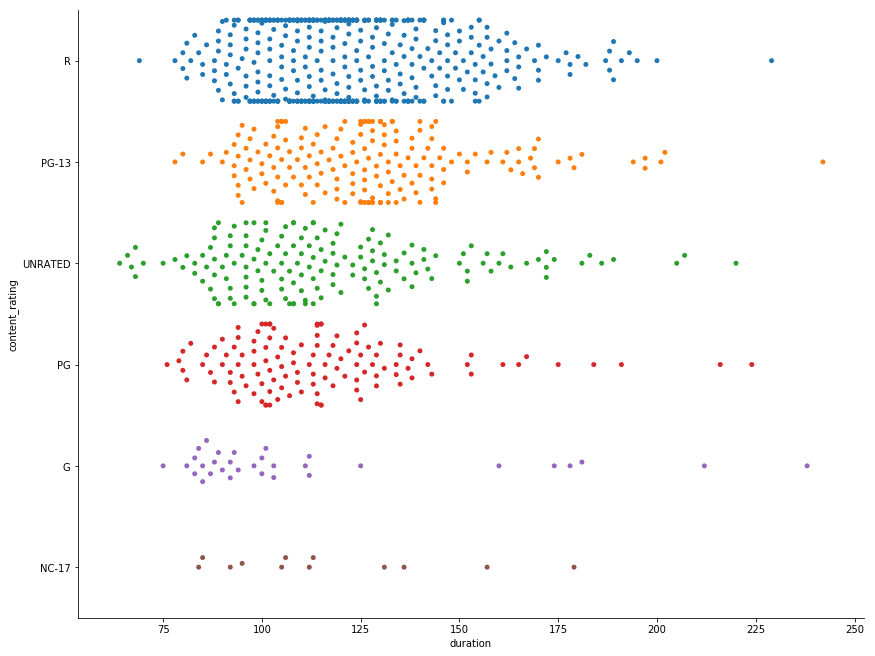

In [42]:
# Answer:
cr = sns.catplot(x="duration",y="content_rating",kind='swarm',data=movies) #Create a swarmplot for content_rating duration
cr.fig.set_size_inches(15,10)  #plot size

#### Determine the top rated movie (by star rating) for each genre.

In [43]:
# Answer:
#Data seems to be sorted already but assuming is not, first I sort, group by genre and then get the first row of each group.
movies.sort_values('star_rating',ascending=False).groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [44]:
# Answer:
# I select values from title column and pass it to the "isin" function which search for this values on specific column (in this case titles)
# They are not actually duplicates
movies[movies.title.isin(movies[movies.title.duplicated()].title)] 

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [45]:
# Answer:
m_in_genre = (movies.groupby('genre').title.count())>9 # group by genre and get the ones with 10 or mor movies
movies[movies['genre'].isin(m_in_genre[m_in_genre].index)].groupby('genre').star_rating.mean() #Pass previous result to "isin" function to select only thoese genres and exclude the others

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 1: manually create a list of relevant genres, then filter using that list

In [46]:
# Answer:
relevant_genre = ['Thriller','Film-Noir','Fantasy','Sci-Fi'] # list of genres
movies[movies['genre'].isin(relevant_genre)] #Pass previous list to isin function to filter

,star_rating,title,content_rating,genre,duration,actors_list
105,8.3,The Third Man,UNRATED,Film-Noir,93,"[u'Orson Welles', u'Joseph Cotten', u'Alida Va..."
145,8.2,Blade Runner,R,Sci-Fi,117,"[u'Harrison Ford', u'Rutger Hauer', u'Sean You..."
210,8.1,Laura,UNRATED,Film-Noir,88,"[u'Gene Tierney', u'Dana Andrews', u'Clifton W..."
321,8.0,Brazil,R,Sci-Fi,132,"[u'Jonathan Pryce', u'Kim Greist', u'Robert De..."
350,8.0,Shadow of a Doubt,UNRATED,Thriller,108,"[u'Teresa Wright', u'Joseph Cotten', u'Macdona..."
408,7.9,Gravity,PG-13,Sci-Fi,91,"[u'Sandra Bullock', u'George Clooney', u'Ed Ha..."
484,7.8,The Day the Earth Stood Still,UNRATED,Sci-Fi,92,"[u'Michael Rennie', u'Patricia Neal', u'Hugh M..."
496,7.8,Misery,R,Thriller,107,"[u'James Caan', u'Kathy Bates', u'Richard Farn..."
637,7.7,The Butterfly Effect,R,Sci-Fi,113,"[u'Ashton Kutcher', u'Amy Smart', u'Melora Wal..."
638,7.7,The City of Lost Children,R,Fantasy,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [47]:
# Answer:
some_genres = (movies['genre'].value_counts())<10 #Get genres with less than 10 movies
some_genres[some_genres].index.values.tolist() # Convert to list using tolist() function

['Western', 'Thriller', 'Sci-Fi', 'Film-Noir', 'Family', 'Fantasy', 'History']

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [48]:
# Answer:
filterbool = pd.Series([True, False, False, True, False, False, True, False,True, False, False, True, False, True, True, False], name='bools') # my list of bools
genresavg = movies.groupby('genre')['star_rating'].mean() # Mean of all genres
genresavg

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

In [49]:
genresavg[filterbool.values] #Filtered using my bools

genre
Action       7.884559
Biography    7.862338
Drama        7.902518
Fantasy      7.700000
Horror       7.806897
Sci-Fi       7.920000
Thriller     7.680000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [50]:
# Answer:
mov = movies.groupby('genre')['star_rating'].agg(['count','mean']) #multiple aggregates using agg() function.
mov[mov['count']>100] #Get those with count > 100

,count,mean
genre,,
Action,136,7.884559
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518


## Bonus

#### Figure out something "interesting" using the actors data!

In [67]:
df = pd.read_csv('imdb_1000.csv')

In [68]:
s = df['actors_list'].str.split(',').apply(Series, 1).stack() # separate actors_list by comma(,) and create a series 
s.index = s.index.droplevel(-1) # to line up with df's index
s.name = 'actors_raw' # the series needs a name to join to dataframe
del df['actors_list'] #remove the old actors_list
df = df.join(s) #join the series to the dataframe
df.head()

,star_rating,title,content_rating,genre,duration,actors_raw
0,9.3,The Shawshank Redemption,R,Crime,142,[u'Tim Robbins'
0,9.3,The Shawshank Redemption,R,Crime,142,u'Morgan Freeman'
0,9.3,The Shawshank Redemption,R,Crime,142,u'Bob Gunton']
1,9.2,The Godfather,R,Crime,175,[u'Marlon Brando'
1,9.2,The Godfather,R,Crime,175,u'Al Pacino'


In [69]:
df['Actor']=df['actors_raw'].str.replace('u\'', '').str.replace('u\"', '').str.replace('\'', '').str.replace('[', '').str.replace(']', '') #Create a new Actor column with cleaned string
df.head()

,star_rating,title,content_rating,genre,duration,actors_raw,Actor
0,9.3,The Shawshank Redemption,R,Crime,142,[u'Tim Robbins',Tim Robbins
0,9.3,The Shawshank Redemption,R,Crime,142,u'Morgan Freeman',Morgan Freeman
0,9.3,The Shawshank Redemption,R,Crime,142,u'Bob Gunton'],Bob Gunton
1,9.2,The Godfather,R,Crime,175,[u'Marlon Brando',Marlon Brando
1,9.2,The Godfather,R,Crime,175,u'Al Pacino',Al Pacino


In [70]:
movies_per_actor=df.groupby('Actor')['title'].count() #Group and count movies for each actor
movies_per_actor.nlargest(n = 3) #Get the top 3

Actor
Robert De Niro    13
Tom Hanks         12
Clint Eastwood    11
Name: title, dtype: int64

In [71]:
top_actors_movies = df[df['Actor'].isin(movies_per_actor.nlargest(n = 3).index)] # To get all data for top 3 actors
filter_byrating = top_actors_movies[(top_actors_movies['star_rating']>7)] #filter rating > 7
filter_byrating

,star_rating,title,content_rating,genre,duration,actors_raw,Actor
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,[u'Clint Eastwood',Clint Eastwood
13,8.8,Forrest Gump,PG-13,Drama,142,[u'Tom Hanks',Tom Hanks
18,8.7,Goodfellas,R,Biography,146,[u'Robert De Niro',Robert De Niro
36,8.6,Saving Private Ryan,R,Action,169,[u'Tom Hanks',Tom Hanks
40,8.5,The Green Mile,R,Crime,189,[u'Tom Hanks',Tom Hanks
78,8.4,Once Upon a Time in America,R,Crime,229,[u'Robert De Niro',Robert De Niro
81,8.4,Toy Story 3,G,Animation,103,[u'Tom Hanks',Tom Hanks
92,8.4,Taxi Driver,R,Crime,113,[u'Robert De Niro',Robert De Niro
107,8.3,For a Few Dollars More,APPROVED,Western,132,[u'Clint Eastwood',Clint Eastwood
117,8.3,Toy Story,G,Animation,81,[u'Tom Hanks',Tom Hanks


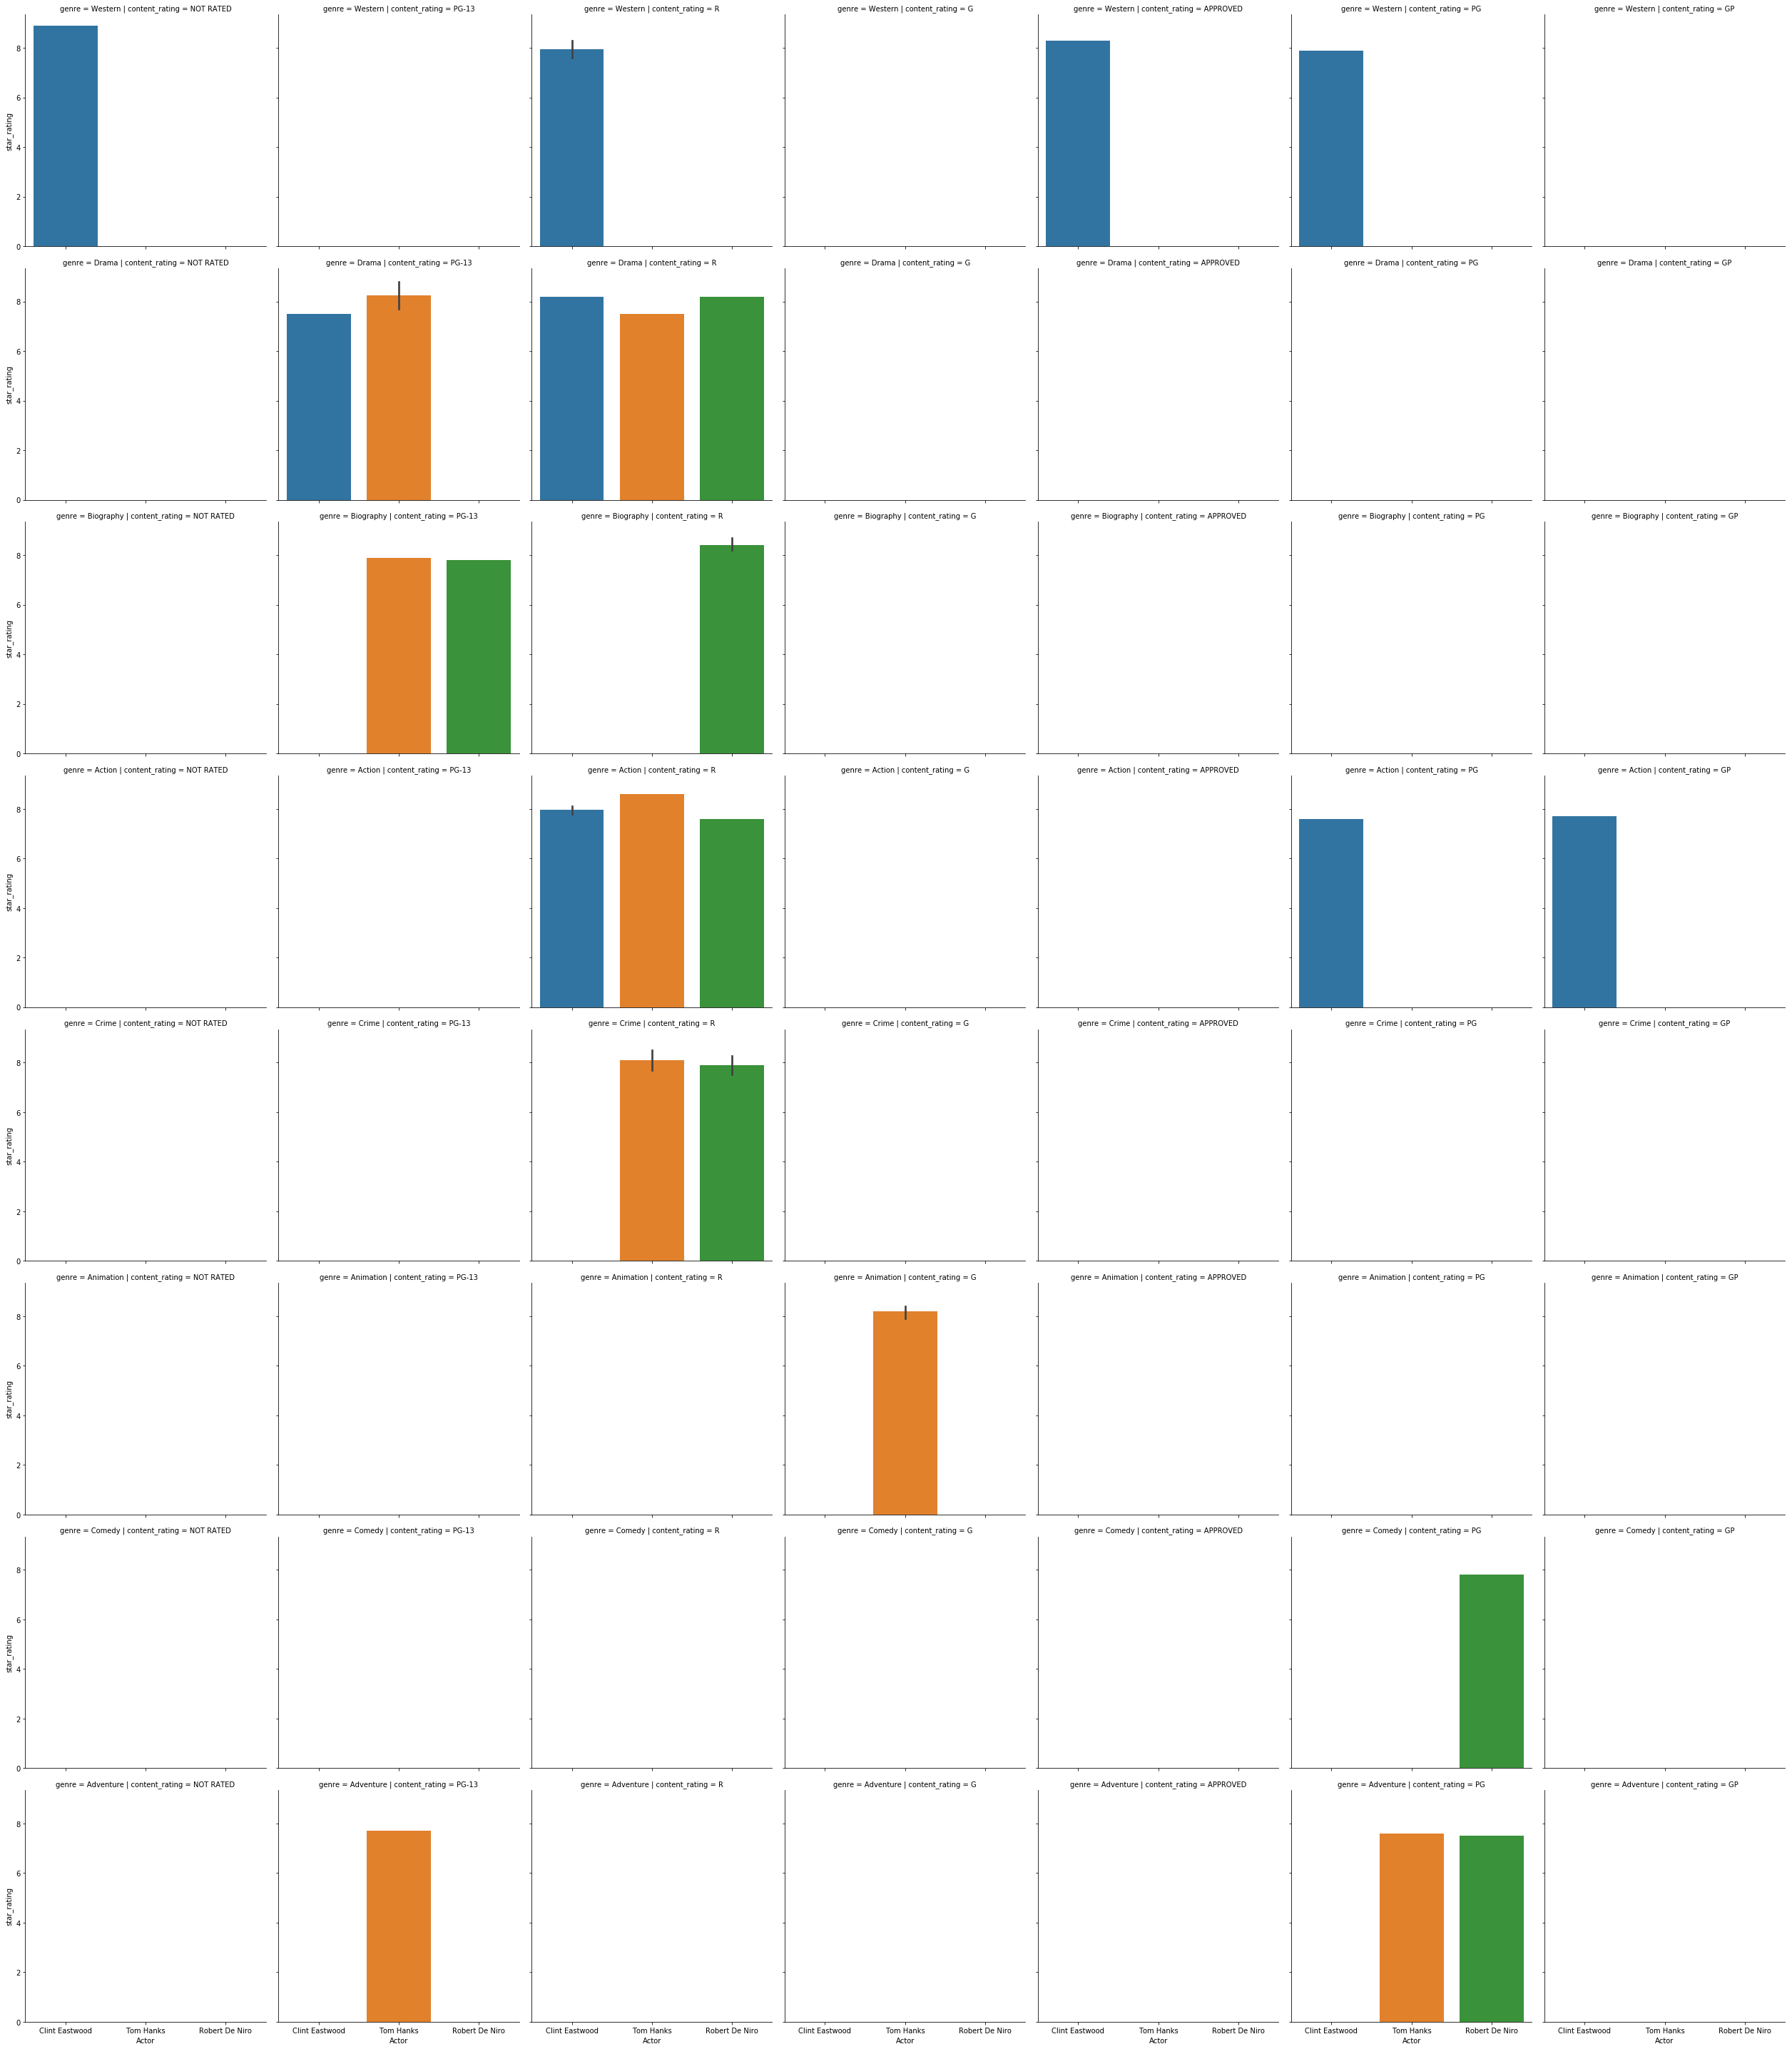

In [72]:
#based on the graphics below I'd say that Rated R -> Drama or Crime with one or all of these actor will get high ratings
sns.catplot(x='Actor',y='star_rating',kind='bar', col='content_rating', row='genre', data=filter_byrating) # Graphic